In [2]:
import numpy as np
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
from pydataset import data
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from acquire import *
from prepare import *
from explore import *

In [2]:
# Create a pandas dataframe, df_iris, from this data.

df = data("iris")

#     print the first 3 rows

print(df.head(3), "\n")

#     print the number of rows and columns (shape)

print("Shape of the dataframe is", df.shape, ".\n")

#     print the column names
#     print the data type of each column

print(df.info(), "\n")

#     print the summary statistics for each of the numeric variables

print(df.describe())

   Sepal.Length  Sepal.Width  Petal.Length  Petal.Width Species
1           5.1          3.5           1.4          0.2  setosa
2           4.9          3.0           1.4          0.2  setosa
3           4.7          3.2           1.3          0.2  setosa 

Shape of the dataframe is (150, 5) .

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 1 to 150
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal.Length  150 non-null    float64
 1   Sepal.Width   150 non-null    float64
 2   Petal.Length  150 non-null    float64
 3   Petal.Width   150 non-null    float64
 4   Species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 7.0+ KB
None 

       Sepal.Length  Sepal.Width  Petal.Length  Petal.Width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.057333      3.758000     1.199333
std        0.828066     0.435866      1.765298     0.762238


In [3]:
 # Read the data from the provided google sheet into a dataframe, df_google.

csv_file1 = "train.csv"
df_google = pd.read_csv(csv_file1)

    # print the first 3 rows

print(df_google.head(3), "\n")

    # print the number of rows and columns

print(df_google.shape, "\n")

    # print the column names
    # print the data type of each column

print(df_google.info(), "\n")

    # print the summary statistics for each of the numeric variables

print(df_google.describe(), "\n")

    # print the unique values for each of your categorical variables

print(df_google.value_counts())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Thayer)  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S   

(891, 12) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64

In [4]:
# Download the previous exercise's file into an excel (File → Download → 
# Microsoft Excel). Read the downloaded file into a dataframe named df_excel.

xl_file1 = "train.xlsx"
df_excel = pd.read_excel(xl_file1)

    # assign the first 100 rows to a new dataframe, df_excel_sample

df_excel_sample = df_excel[:101]

    # print the number of rows of your original dataframe

print(df_excel.shape, "\n")

    # print the first 5 column names

print(df_excel.columns[:5].to_list(), "\n")

    # print the column names that have a data type of object

print(df_excel.select_dtypes(include = ["object"]).columns.to_list(), "\n")

    # compute the range for each of the numeric variables.

print((df_excel.select_dtypes(include = ["float"]).max()) - (df_excel.select_dtypes(include = ["float"]).min()) )


(891, 12) 

['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex'] 

['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'] 

PassengerId    890.0000
Survived         1.0000
Pclass           2.0000
Age             79.5800
SibSp            8.0000
Parch            6.0000
Fare           512.3292
dtype: float64


In [5]:
df = get_iris_data()
# df = df.drop(columns=["species_id", "measurement_id"])
# df = df.rename(columns={"species_name": "species"})
# dummy_df = pd.get_dummies(df[["species"]], drop_first=True)
# df = pd.concat([df, dummy_df], axis=1)

prep_iris(df)

df.head()

,Unnamed: 0,species_id,species_name,measurement_id,sepal_length,sepal_width,petal_length,petal_width
0,0,1,setosa,1,5.1,3.5,1.4,0.2
1,1,1,setosa,2,4.9,3.0,1.4,0.2
2,2,1,setosa,3,4.7,3.2,1.3,0.2
3,3,1,setosa,4,4.6,3.1,1.5,0.2
4,4,1,setosa,5,5.0,3.6,1.4,0.2


In [6]:
df = get_telco_data()
# df = df.drop(columns = ["contract_type", "payment_type",
#                        "internet_service_type"])
# dummy_df = pd.get_dummies(df[["gender"]], drop_first=True)
# df = pd.concat([df, dummy_df], axis=1)

prep_telco(df)

df.head()

,payment_type_id,internet_service_type_id,contract_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type
0,2,1,2,0002-ORFBO,Female,0,Yes,Yes,9,Yes,...,Yes,Yes,No,Yes,65.6,593.3,No,One year,DSL,Mailed check
1,2,1,1,0003-MKNFE,Male,0,No,No,9,Yes,...,No,No,Yes,No,59.9,542.4,No,Month-to-month,DSL,Mailed check
2,1,2,1,0004-TLHLJ,Male,0,No,No,4,Yes,...,No,No,No,Yes,73.9,280.85,Yes,Month-to-month,Fiber optic,Electronic check
3,1,2,1,0011-IGKFF,Male,1,Yes,No,13,Yes,...,No,Yes,Yes,Yes,98.0,1237.85,Yes,Month-to-month,Fiber optic,Electronic check
4,2,2,1,0013-EXCHZ,Female,1,Yes,No,3,Yes,...,Yes,Yes,No,Yes,83.9,267.4,Yes,Month-to-month,Fiber optic,Mailed check


In [7]:
df = get_titanic_data()
# titanic = titanic.drop(columns=['embarked','class', 'age','deck'])
# dummy_df = pd.get_dummies(data=titanic[['sex','embark_town']], drop_first=True)
# titanic = pd.concat([titanic, dummy_df], axis=1)
prep_tit(df)

df.head()

,Unnamed: 0,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,0,3,male,22.0,1,0,7.2500,S,Third,NaN,Southampton,0
1,1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0
2,2,2,1,3,female,26.0,0,0,7.9250,S,Third,NaN,Southampton,1
3,3,3,1,1,female,35.0,1,0,53.1000,S,First,C,Southampton,0
4,4,4,0,3,male,35.0,0,0,8.0500,S,Third,NaN,Southampton,1


In [8]:
df = new_attendance_df()

df = df.melt(id_vars = "Unnamed", var_name = "date", value_name = "attend")
df.attend = df.attend.map({"P":1, "H":.5, "A":0, "T":.9}) #Tardies policy needed MAJOR clarification.
df.groupby("Unnamed").mean()

df.head(3)

KeyError: 'Unnamed'

In [ ]:
df = new_coffee_df()
df = df.pivot_table(index = "hour", columns = "coffee_carafe")

df.head(3)

coffee_amount                    
coffee_carafe             x         y         z
hour                                           
8                  0.816164  0.189297  0.999264
9                  0.451018  0.521502  0.915990
10                 0.843279  0.023163  0.144928

In [ ]:
df = new_cake_df()
df = df.melt(id_vars = "recipe : position", var_name = "temp",
             value_name = "score")
df[["recipe", "position"]] = df["recipe : position"].str.split(":", expand = True)
df = df.drop(columns="recipe : position")
df = df.groupby(["recipe", "position", "temp"]).mean()

df

,count,mean,std,min,25%,50%,75%,max
sepal_length,90.0,5.784444,0.833688,4.3,5.000,5.8,6.4,7.7
sepal_width,90.0,3.014444,0.384404,2.0,2.800,3.0,3.2,4.2
petal_length,90.0,3.714444,1.735069,1.0,1.525,4.4,5.1,6.7
petal_width,90.0,1.207778,0.772305,0.1,0.225,1.4,1.8,2.5
species_versicolor,90.0,0.333333,0.474045,0.0,0.000,0.0,1.0,1.0
species_virginica,90.0,0.333333,0.474045,0.0,0.000,0.0,1.0,1.0


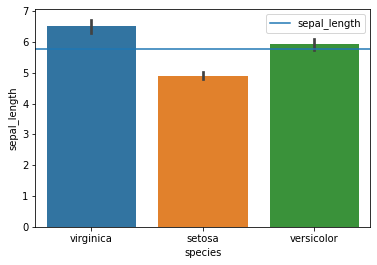

We reject the null hypothesis that species and sepal_length are independent.
There appears to be a relationship between sepal_length and species.


In [6]:
train, validate, test = prep_split(prep_iris(new_iris_df()), "species")

display(train.describe().transpose())

cat_analysis(train, "species", "sepal_length")

,count,mean,std,min,25%,50%,75%,max
passenger_id,534.0,462.176030,263.197867,0.0,236.2500,478.5000,693.750000,890.0000
survived,534.0,0.415730,0.493310,0.0,0.0000,0.0000,1.000000,1.0000
pclass,534.0,2.307116,0.837257,1.0,2.0000,3.0000,3.000000,3.0000
sibsp,534.0,0.552434,1.139461,0.0,0.0000,0.0000,1.000000,8.0000
parch,534.0,0.393258,0.827999,0.0,0.0000,0.0000,0.000000,6.0000
fare,534.0,33.314153,51.417854,0.0,7.9031,15.2458,31.359375,512.3292
alone,534.0,0.591760,0.491969,0.0,0.0000,1.0000,1.000000,1.0000
sex_male,534.0,0.634831,0.481929,0.0,0.0000,1.0000,1.000000,1.0000
embark_town_Queenstown,534.0,0.089888,0.286289,0.0,0.0000,0.0000,0.000000,1.0000
embark_town_Southampton,534.0,0.707865,0.455170,0.0,0.0000,1.0000,1.000000,1.0000


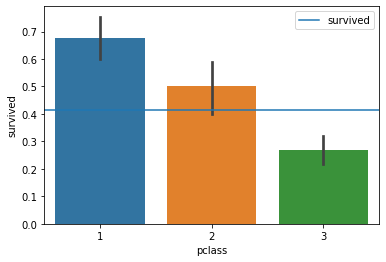

We reject the null hypothesis that pclass and survived are independent.
There appears to be a relationship between survived and pclass.


In [8]:
train, validate, test = prep_split(prep_tit(new_tit_df()), "pclass")

display(train.describe().transpose())

cat_analysis(train, "pclass", "survived")

,count,mean,std,min,25%,50%,75%,max
senior_citizen,4225.0,0.165917,0.372050,0.0,0.00,0.00,0.00,1.0
tenure,4225.0,32.121893,24.498996,0.0,8.00,28.00,55.00,72.0
monthly_charges,4225.0,64.536237,30.018203,18.4,35.25,70.35,89.75,118.6
gender_encoded,4225.0,0.492544,0.500004,0.0,0.00,0.00,1.00,1.0
partner_encoded,4225.0,0.487337,0.499899,0.0,0.00,0.00,1.00,1.0
dependents_encoded,4225.0,0.307219,0.461396,0.0,0.00,0.00,1.00,1.0
phone_service_encoded,4225.0,0.909349,0.287146,0.0,1.00,1.00,1.00,1.0
paperless_billing_encoded,4225.0,0.585325,0.492724,0.0,0.00,1.00,1.00,1.0
churn_encoded,4225.0,0.265325,0.441559,0.0,0.00,0.00,1.00,1.0
multiple_lines_No phone service,4225.0,0.090651,0.287146,0.0,0.00,0.00,0.00,1.0


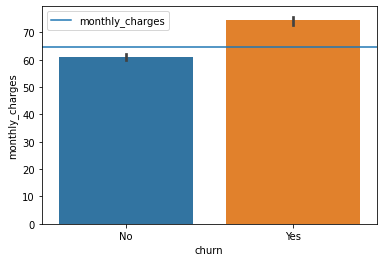

We reject the null hypothesis that churn and monthly_charges are independent.
There appears to be a relationship between monthly_charges and churn.


In [12]:
# train = prep_telco(get_telco_data())
# train = train.head()
train, validate, test = prep_split(prep_telco(get_telco_data()), "churn")

display(train.describe().transpose())

cat_analysis(train, "churn", "monthly_charges")